# Final Yandex Data Analyst Project by Evgeniy. 

The dataset contains the transaction history of an online store that sells household goods.

**Task:**

Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

So our task is:  
## To look at the items that were ordered, categorize them and then analyze which items (or categories) were selling better and when.

______________  
  
______________
______________
  
    

Useful Sources:  
* Lambda function - https://datascience.stackexchange.com/questions/17769/how-to-fill-missing-value-based-on-other-columns-in-pandas-dataframe 
* TextBlob https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/
* All the Pandas documentation https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
* https://www.notion.so/E-Commerce-Product-Range-Analysis-e986f443b6a14b8b9d64dff006451577 Heheh
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
* https://www.geeksforgeeks.org/get-all-rows-in-a-pandas-dataframe-containing-given-substring/
* https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
____

PDF Presentation link: https://drive.google.com/file/d/1JRF0Pzq7MkMffvb6sKi60Q0FDyW9Zw5k/view?usp=sharing  
Tableau link: https://public.tableau.com/profile/eugene.eugene#!/vizhome/E-CommerceTableauDash/Sheet1?publish=yes

# Step 1. Import the data.

In [62]:
import pandas as pd
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import nltk
import plotly.express as px 
import seaborn as sns

In [63]:
!pip install -U textblob
!python -m textblob.download_corpora
from textblob import TextBlob

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: textblob in /home/jovyan/.local/lib/python3.7/site-packages (0.15.3)
[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/jovyan/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package movie_reviews is already up-t

In [64]:
# nltk.download('brown')

In [65]:
df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


## Conclusion.
We've imported the data :)

# Step 2. Data preprocessing.

### Study type correspondence

First let's convert InvoiceTable to datetime object.

In [68]:
df['InvoiceDate'] = df['InvoiceDate'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))

### Study missing values

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


We can see that there are missing values in columns:
* Description    
* CustomerID  
  
    
Let's look into it

In [70]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


Hmm, we can see that both description and CutomerID are missing. Are there any rows where there **is no** Description but **there is** CustomerId?

In [71]:
df[(df.Description.isnull()) & (df.CustomerID.notnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


And opposite?

In [72]:
df[(df.Description.notnull()) & (df.CustomerID.isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


This means that all the missing descriptions **also have a missing** CustomerID, but not all missing CustomerID also have a missing description.  
Let's look at the amount of items missing description by their **StockCode**.

In [73]:
df[df.Description.isnull()].StockCode.nunique()

960

Okay, so there are 960 items missing description. Let's try looking if there are rows with same StockCodes **with description**.

In [74]:
CodeList = df[df.Description.isnull()].StockCode.to_list()

In [75]:
CodeTable = df.query('Description.notnull() and StockCode in @CodeList')[['StockCode', 'Description']]
CodeTable.head()

,StockCode,Description
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT


Nice! We got a dataframe with descriptions to all the missing StockCode. Now we got to find a way to replace missing values with these.

In [76]:
 CodeTable = CodeTable.drop_duplicates()

In [77]:
CodeTable[CodeTable.StockCode == '21868']

,StockCode,Description
2605,21868,POTTING SHED TEA MUG
514183,21868,check
522246,21868,Amazon


We can also see that a lot of items have processing remarks instead of description.

In [78]:
CodeTable.Description.value_counts().head(30)

check                               43
?                                   28
damaged                             17
found                               14
damages                              9
adjustment                           7
had been put aside                   5
dotcom                               5
Found                                5
Amazon                               4
amazon                               3
Damaged                              3
PINK FLOCK GLASS CANDLEHOLDER        2
CHECK                                2
AMAZON                               2
reverse 21/5/10 adjustment           2
damages?                             2
sold as set on dotcom                2
ROUND BLUE CLOCK WITH SUCKER         2
returned                             2
PICNIC BASKET WICKER SMALL           1
ASS COL LARGE SAND FROG P'WEIGHT     1
SCALLOP SHELL SOAP DISH              1
BLUE PAISLEY NOTEBOOK                1
WOODEN SKITTLES GARDEN SET           1
LA PALMIERA WALL THERMOME

We can see that all that were present more than 1 time are not actual description but remarks.
We can drop those.

In [79]:
CodeTable = CodeTable.drop_duplicates(subset='Description')

In [80]:
CodeTable = CodeTable.drop_duplicates(subset='StockCode')

In [81]:
CodeTable.reset_index(drop=True, inplace=True)

In [82]:
CodeTable.head()

,StockCode,Description
0,84406B,CREAM CUPID HEARTS COAT HANGER
1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
2,84029E,RED WOOLLY HOTTIE WHITE HEART.
3,22633,HAND WARMER UNION JACK
4,22632,HAND WARMER RED POLKA DOT


Now we got a table with mostly item descriptions that we need.
Now we need to apply these to the missing values in out original df.  
For that we will merge two tables and then perform **lambda** function to copy description to missing values.

In [83]:
df_right = pd.merge(df, CodeTable, on='StockCode', how='left')

In [84]:
df_right.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Description_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,NaN
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,RED WOOLLY HOTTIE WHITE HEART.


In [85]:
len(df_right[df_right.Description_x.isnull()])

1454

In [86]:
#df_right[df_right.Description_x.isnull()]['Description_x'] = df_right[df_right.Description_x.isnull()]['Description_y']

df_right['Description_x'] = df_right.apply(
lambda row: row['Description_y'] if pd.isnull(row['Description_x']) else row['Description_x'], axis=1
)


In [87]:
len(df_right[df_right.Description_x.isnull()])

114

In [88]:
df_right.drop('Description_y', axis=1, inplace=True)

In [89]:
df_right.rename(columns={"Description_x": "Description"}, inplace=True)

In [90]:
df = df_right

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541795 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


Now we got only ~100 rows with missing description. That amount we can simply drop.  
Let's proceed to the CustomerID
____
____

In [92]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


Awful, about 135k missing values. However something tells me that we can retrieve most of those using **InvoiceNo**, since each customer had same Invoice while purchasing.

In [93]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2019-12-07 12:50:00,3.75,12680.0
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2019-12-07 12:50:00,3.75,12680.0
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2019-12-07 12:50:00,1.95,12680.0
541902,581587,22629,SPACEBOY LUNCH BOX,12,2019-12-07 12:50:00,1.95,12680.0
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2019-12-07 12:50:00,4.15,12680.0
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2019-12-07 12:50:00,4.95,12680.0


In [94]:
NullInvoice = df.query('CustomerID.isnull()')['InvoiceNo'].to_list()

In [95]:
df.query('CustomerID.notnull() and InvoiceNo in @NullInvoice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


Oops. Turns out my hypothesis was kind of wrong. We can not retreive the users from the Invoices. :(
Then let's just mark them as "Unidentified" and look at them separately.

In [96]:
df['CustomerID'].fillna('unidentified', inplace=True)

And get rid of a 100 rows with missing description left.

In [97]:
df.dropna(inplace=True)

Now, let's remove the duplicates and we're done!

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536527 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      536527 non-null object
StockCode      536527 non-null object
Description    536527 non-null object
Quantity       536527 non-null int64
InvoiceDate    536527 non-null datetime64[ns]
UnitPrice      536527 non-null float64
CustomerID     536527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.7+ MB


Let's have a look at the **weird** values.

In [100]:
df.query('Quantity < 0')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315


Items with negative quantity. About 9000 rows. Those may be returns. We will have to analyze them separately.

In [101]:
df.query('UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,unidentified
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,unidentified


'Adjust bad debt' Hmm interesting, but im pretty sure we can get rid of those.

In [102]:
df = df.query('UnitPrice > 0').reset_index(drop=True)

In [103]:
df.query("UnitPrice == 0 and CustomerID == 'unidentified'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


We got 2300 rows without unit price and customer ID. It's better to get rid of them

In [104]:
df_remove = df.query("UnitPrice == 0 and CustomerID == 'unidentified'").index.to_list()

df = df.query('index not in @df_remove').reset_index(drop=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534129 entries, 0 to 534128
Data columns (total 7 columns):
InvoiceNo      534129 non-null object
StockCode      534129 non-null object
Description    534129 non-null object
Quantity       534129 non-null int64
InvoiceDate    534129 non-null datetime64[ns]
UnitPrice      534129 non-null float64
CustomerID     534129 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.5+ MB


## Concluison.
In this stage we've closely looked at our data, cleaned and fixed it, and now it's completley ready for a thorough analysis!

# Step 3. EDA.

As we've concluded in the previous chapter there are many abnormalities in our data and we will have to analyze them separately.  
Let's create a table **without unidentified** customers.

In [106]:
df_user_filtered = df.query("CustomerID != 'unidentified'").reset_index(drop=True)

### Price

count    534129.000000
mean          4.695864
std          95.079189
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

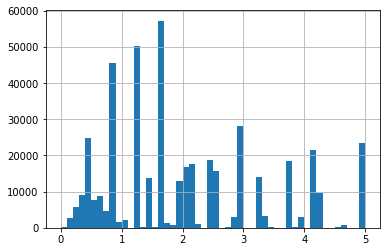

In [107]:
df.UnitPrice.hist(bins = 50, range =(0, 5))
df.UnitPrice.describe()

By looking at the describe method results I've separated the range between 0 and 5 dollars, since orders of more than 55 dollars are a minority.  
We can see that the majority of the items are priced **between 0.80 and 1.8$**

### Quantity

count    534129.000000
mean          9.916818
std         216.452113
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

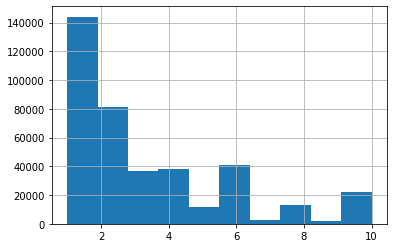

In [108]:
df.Quantity.hist(bins = 10, range =(1, 10))
df.Quantity.describe()

By looking at the describe method we may conclude that most of the purcahses were made with 1 piece of an item, however about 50% of them had 2 or 3.\

### Date.

In [109]:
df['date'] = df.InvoiceDate.dt.date

count         534129
unique           305
top       2019-12-03
freq            5284
Name: date, dtype: object

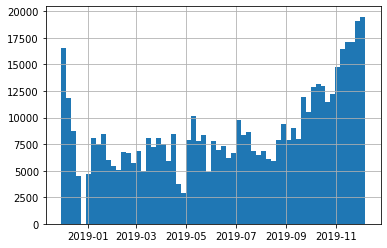

In [110]:
df['date'].hist(bins=61)
df.date.describe()

### Revenue.

In [111]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [112]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34


In [113]:
revenue_chart = df.groupby('date')['Revenue'].sum().reset_index()

In [114]:
revenue_chart

,date,Revenue
0,2018-11-29,58451.56
1,2018-11-30,46088.32
2,2018-12-01,45575.38
3,2018-12-03,30973.63
4,2018-12-04,53653.87
...,...,...
300,2019-12-03,57630.20
301,2019-12-04,54109.39
302,2019-12-05,74952.61
303,2019-12-06,81294.33


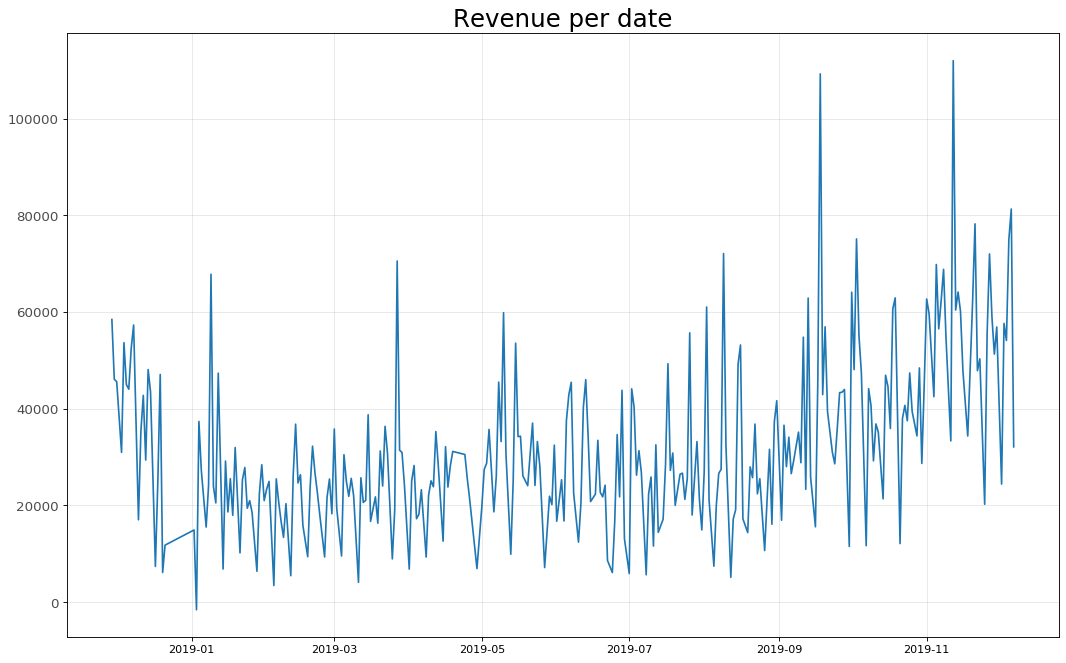

In [115]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'Revenue', data=revenue_chart, color='tab:blue')

#plt.ylim(50, 750)
xtick_location = revenue_chart.index.tolist()[::61]
#xtick_labels = revenue_chart.date.tolist()
#plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Revenue per date", fontsize=22)
plt.grid(axis='both', alpha=.3)

Hmm, it's a little bit difficult to say with this graph.
Let's have a look at the Revenue per month.

In [116]:
df['month'] = df.InvoiceDate.dt.month

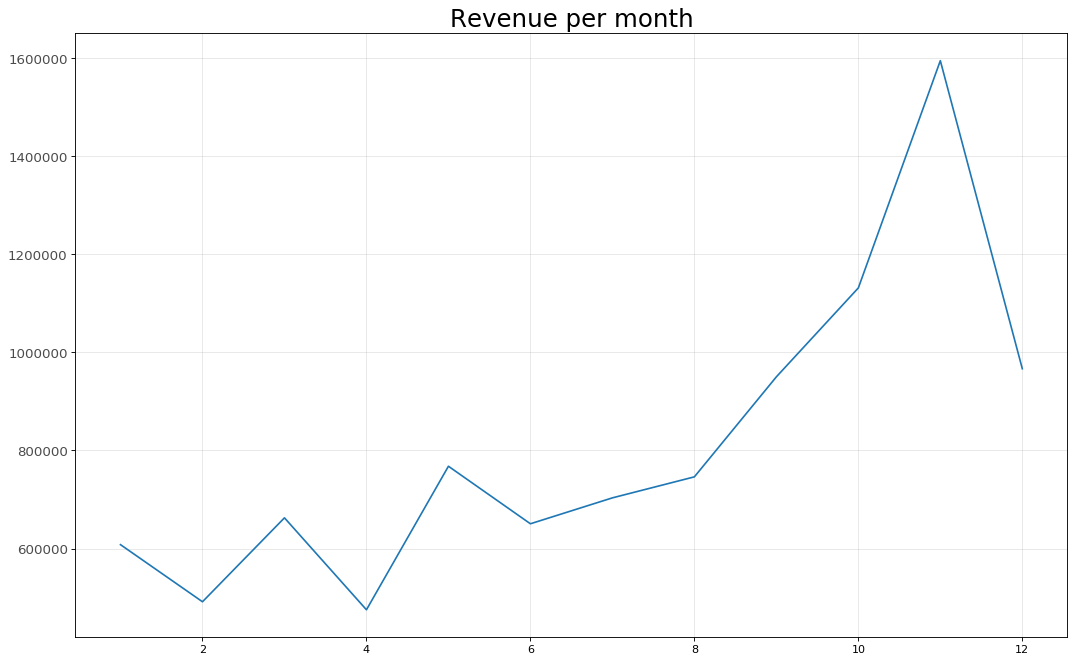

In [117]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'Revenue', data=df.groupby('month')['Revenue'].sum().reset_index(), color='tab:blue')

#plt.ylim(50, 750)
#xtick_location = revenue_chart.index.tolist()[::61]
#xtick_labels = revenue_chart.date.tolist()
#plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Revenue per month", fontsize=22)
plt.grid(axis='both', alpha=.3)


Here we can see that the shop has an **increase** in revenue towards the end of the year. 
This may be due to people buying more stuff towards the holidays.

We're **not taking into** account December since only 1 week of it is in our data.

## Conclusion.
During this stage we've performed EDA and came to several conclusion:
* We can see that the majority of the items are priced **between 0.80 and 1.8$**
* By looking at the describe method we may conclude that most of the purcahses were made with 1 piece of an item, however about 50% of them had 2 or 3.
* we can see that the shop has an **increase in revenue** towards the end of the year.  

# Step 4. Product range analysis.

Let's prepare our data for lemmatization. 

In [118]:
df['Description'] = df['Description'].str.lower()

In [119]:
df['Description'].value_counts().head(20)

white hanging heart t-light holder    2353
regency cakestand 3 tier              2187
jumbo bag red retrospot               2153
party bunting                         1719
lunch bag red retrospot               1625
assorted colour bird ornament         1488
set of 3 cake tins pantry design      1465
pack of 72 retrospot cake cases       1367
lunch bag  black skull.               1323
natural slate heart chalkboard        1272
postage                               1252
jumbo bag pink polkadot               1245
heart of wicker small                 1230
jam making set with jars              1220
jumbo storage bag suki                1211
paper chain kit 50's christmas        1194
jumbo shopper vintage red paisley     1192
lunch bag cars blue                   1185
lunch bag spaceboy design             1177
jam making set printed                1177
Name: Description, dtype: int64

Now let's use TextBlob for taking out the nouns, it will help us categorizing data.

In [120]:
df['lemmatized'] = df['Description'].apply(lambda words: TextBlob(words).noun_phrases)

In [121]:
df['lemmatized'].value_counts().head(50)

[]                                      45253
[heart t-light holder]                   3235
[hot water bottle]                       2554
[jam making]                             2397
[alarm clock bakelike]                   2370
[regency cakestand]                      2187
[jumbo bag, red retrospot]               2153
[lunch bag, red retrospot]               1625
[blue metal door]                        1597
[colour bird ornament]                   1488
[cake tins pantry design]                1465
[edwardian parasol]                      1441
[retrospot tea]                          1424
[retrospot cake cases]                   1367
[lunch bag suki design]                  1327
[lunch bag, black skull]                 1323
[ceramic trinket box]                    1304
[natural slate heart chalkboard]         1272
[jumbo bag, pink polkadot]               1245
[jumbo storage bag suki]                 1211
[paper chain kit, 's christmas]          1194
[jumbo shopper vintage, red paisle

Now we will have to pick out manually the most recurring objects. Let's look:
* holder
* bottle
* cakestand
* jam
* bag
* door
* ornament
* cake
* jumbo
* regency
* retrospot
* clock
* glass
* party
* teacup
* christmas
* knob
* skull
* box
* kit
* frame

Or we can try doing this with a Counter

In [122]:
from collections import Counter
frequencies = Counter(word for sentence in df['lemmatized'] for word in sentence)
for word, frequency in frequencies.most_common(50):  # get the 10 most frequent words
    print(word, frequency)

red retrospot 7553
hot water bottle 6382
jumbo bag 5729
lunch bag 4901
pink polkadot 3922
's christmas 3286
heart t-light holder 3235
white finish 2829
jam making 2397
alarm clock bakelike 2370
regency cakestand 2187
girl design 2186
ceramic drawer knob 1661
round snack boxes 1647
blue metal door 1597
colour bird ornament 1488
cake tins pantry design 1465
edwardian parasol 1441
retrospot tea 1424
retrospot cake cases 1367
lunch bag suki design 1327
black skull 1323
ceramic trinket box 1304
natural slate heart chalkboard 1272
jumbo storage bag suki 1211
charlotte bag 1195
paper chain kit 1194
jumbo shopper vintage 1192
red paisley 1192
lunch bag cars 1185
lunch bag spaceboy design 1177
blue metal 1168
recipe box pantry 1166
yellow design 1166
craft trinket box 1154
roses regency teacup 1127
wooden picture frame 1124
heart zinc t-light holder 1118
victorian glass 1066
lunch bag apple design 1066
green regency teacup 1064
red retrospot charlotte bag 1060
lunch bag woodland 1049
key fob 10

Now let's try a function

In [123]:
# df_right['Description_x'] = df_right.apply(
# lambda row: row['Description_y'] if pd.isnull(row['Description_x']) else row['Description_x'], axis=1
# )


In [124]:
# df['Category'] = df.apply(lambda col: 'Bag' if col['Description'].str.contains('bag') else '', axis=1)

In [125]:
# for idx, row in df.iterrows():
#       if 'bag' in row['Description']:
#             row['Category'] = 'Bag'

In [126]:
categories = ['holder'
, 'bottle'
, 'cakestand'
, 'jam'
, 'bag'
, 'door'
, 'ornament'
, 'cake'
, 'jumbo'
, 'regency'
, 'retrospot'
, 'clock'
, 'glass'
, 'party'
, 'teacup'
, 'christmas'
, 'knob'
, 'skull'
, 'box'
, 'kit'
, 'frame',
             'chalkboard',
             'lantern',
             'hanger',
             'children',
             'napkins',
             'light']

In [127]:
# df[df['Description'].str.contains(categories[0])]

def categorize(row):
    description = row['Description']
    for i in categories:
        if i in description:
            return i
            
        

In [128]:
df['category'] = df.apply(categorize, axis=1) # Apply the function to the table

In [129]:
df.category.fillna('other', inplace=True)

In [130]:
df.category.value_counts()

other         261631
bag            52426
box            24719
cake           22647
retrospot      22238
christmas      20680
holder         17530
door           13202
bottle         12114
light           9117
glass           8498
kit             8263
clock           7156
frame           6841
party           6236
regency         5742
children        5715
skull           5576
knob            4978
jam             4453
cakestand       2594
lantern         2537
chalkboard      2207
jumbo           2104
hanger          1761
napkins         1676
ornament        1488
Name: category, dtype: int64

Great! Now we've assigned some categorization to the shop's variety of items.

### Which products are more often sold by themselves, and which ones are more often combined with others (main and additional assortment)?

Now, let's check which products were sold by themselves and which were sold in bundles.

In [131]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,Revenue,month,lemmatized,category
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,15.30,11,[heart t-light holder],holder
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34,11,[white metal lantern],lantern


In [132]:
singles_list = df.groupby('InvoiceNo')['UnitPrice'].count().reset_index().query('UnitPrice == 1')['InvoiceNo'].to_list()

We got 3763 items that were bought separatly, not that much..

In [133]:
bundles_list = df.groupby('InvoiceNo')['UnitPrice'].count().reset_index().query('UnitPrice > 1')['InvoiceNo'].to_list()

In [134]:
single_assortment = df.query('InvoiceNo in @singles_list')

In [135]:
bundle_assortment = df.query('InvoiceNo in @bundles_list')

In [136]:
bundle_assortment

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,Revenue,month,lemmatized,category
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,2018-11-29,15.30,11,[heart t-light holder],holder
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34,11,[white metal lantern],lantern
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,2018-11-29,22.00,11,[cream cupid hearts coat hanger],hanger
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34,11,"[union flag, hot water bottle]",bottle
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,2018-11-29,20.34,11,[white heart],other
...,...,...,...,...,...,...,...,...,...,...,...,...
534124,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85,12680,2019-12-07,10.20,12,[spaceboy napkins],napkins
534125,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10,12680,2019-12-07,12.60,12,[children 's apron],children
534126,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,16.60,12,[childrens cutlery],children
534127,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15,12680,2019-12-07,16.60,12,[childrens cutlery circus parade],children


Great! Now we've got 2 separate tables. One has items that were bought separately and another one has items that were bought in bundles. Let's look which categories are more sold separately.

In [137]:
single_df = single_assortment.category.value_counts().reset_index().sort_values(by='index')

In [138]:
bundle_df = bundle_assortment.category.value_counts().reset_index().sort_values(by='index')

We can now see which categories were mostly sold as single.

In [139]:
single_df.sort_values(by='category', ascending=False)

,index,category
0,other,1895
1,bag,206
2,holder,188
4,glass,148
3,box,148
5,cake,142
6,retrospot,131
7,light,125
8,cakestand,88
9,christmas,82


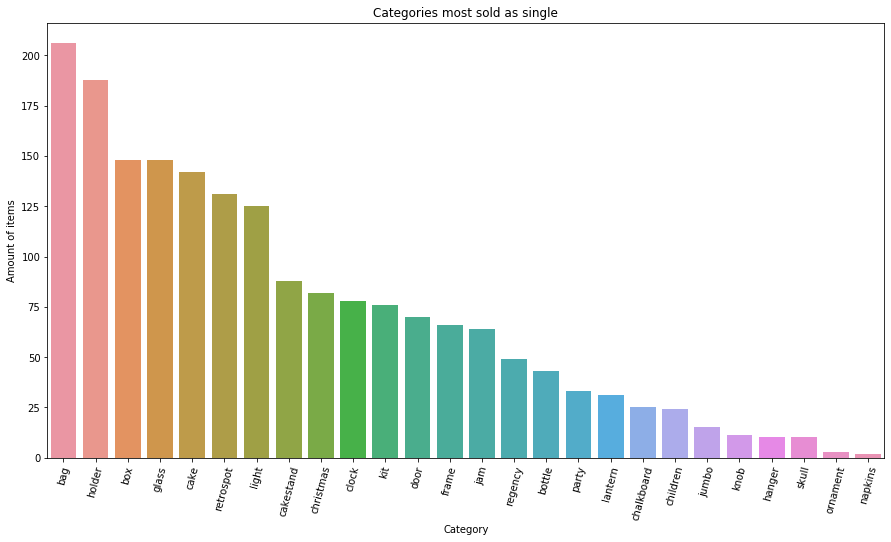

In [140]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="index", y="category", data=single_df.query("index != 'other'").sort_values(by='category', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set(xlabel='Category', ylabel='Amount of items', title='Categories most sold as single')
plt.show()

We can see that such categories as:
* Bag
* Holder
* Box
* Glass
* Cake
* Light

Had a **greater tendency to be sold as single** items.  

Let's look at bundles

In [141]:
bundle_df.sort_values(by='category', ascending=False)

,index,category
0,other,259736
1,bag,52220
2,box,24571
3,cake,22505
4,retrospot,22107
5,christmas,20598
6,holder,17342
7,door,13132
8,bottle,12071
9,light,8992


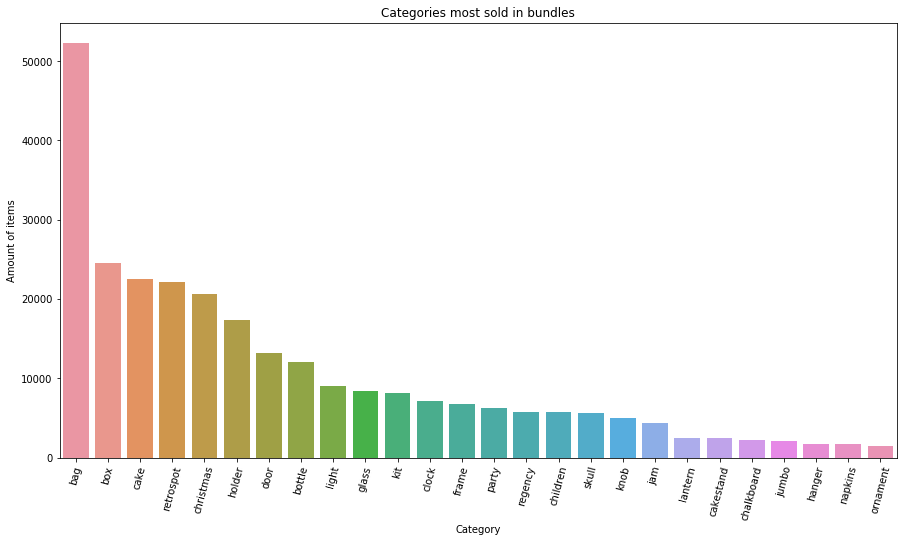

In [142]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="index", y="category", data=bundle_df.query("index != 'other'").sort_values(by='category', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set(xlabel='Category', ylabel='Amount of items', title='Categories most sold in bundles')
plt.show()

We can see that such categories as:
* Bag
* Box
* Cake
* Christmas
* Holder
* Door
* Bottle

Had a **greater tendency to be sold in bundles**.


### What product groups are more often included in the additional assortment?

But it's quite diffcult to say which one is prevailing since they have different quantitiy.  
But what if we calculate **the ratio** of how many items of one category were sold as single and bundle?  
That could give us more precise answers good answers.

In [143]:
bundle_df.rename(columns={'index':'category_name','category':'bundle_amount'}, inplace=True)

In [144]:
compare = pd.concat([single_df, bundle_df], axis=1)

In [145]:
compare.drop('index', axis=1, inplace=True)

In [146]:
compare['Share_of_items_bought_single'] = compare['category'] / compare['bundle_amount'] * 100

In [147]:
compare.sort_values('Share_of_items_bought_single', ascending=False)

,category,category_name,bundle_amount,Share_of_items_bought_single
14,64,party,6203,1.031759
12,70,clock,7078,0.988980
13,66,frame,6775,0.974170
20,24,cakestand,2506,0.957702
7,125,door,13132,0.951873
10,78,glass,8350,0.934132
11,76,kit,8187,0.928301
9,82,light,8992,0.911922
15,49,regency,5693,0.860706
2,188,box,24571,0.765130


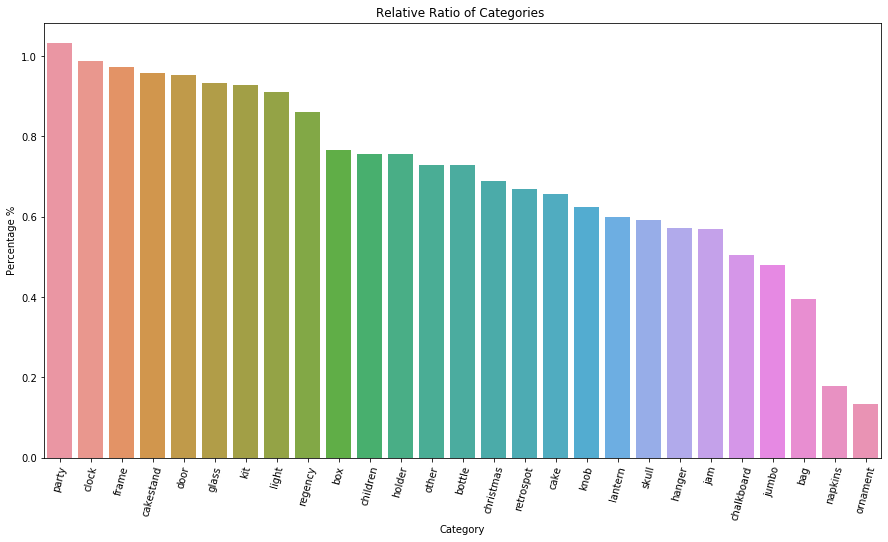

In [148]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="category_name", y="Share_of_items_bought_single", data=compare.sort_values('Share_of_items_bought_single', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set(xlabel='Category', ylabel='Percentage %', title='Relative Ratio of Categories ')
plt.show()

Now we can see that the categories that were mostly bought as single items **(main assortment)** are:
* Party accessories
* Clocks
* Frames
* Lanterns

If we look at the bottom of the list we can say which items were mostly sold as **additional assortment**:
* Ornament
* Napkins
* Bags
* Jumbo stuff
* Chalkboards
* Jam
* Hangers

In [149]:
df[df.category=='party'].head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,Revenue,month,lemmatized,category
247,536392,22127,party cones carnival assorted,12,2018-11-29 10:29:00,1.25,13705,2018-11-29,15.00,11,[party cones carnival],party
248,536392,22128,party cones candy assorted,12,2018-11-29 10:29:00,1.25,13705,2018-11-29,15.00,11,[party cones candy],party
347,536401,21122,set/10 pink polkadot party candles,1,2018-11-29 11:21:00,1.25,15862,2018-11-29,1.25,11,[pink polkadot party candles],party
400,536404,21061,party invites football,12,2018-11-29 11:29:00,0.85,16218,2018-11-29,10.20,11,[],party
401,536404,21063,party invites jazz hearts,12,2018-11-29 11:29:00,0.85,16218,2018-11-29,10.20,11,[jazz hearts],party
402,536404,21062,party invites spaceman,12,2018-11-29 11:29:00,0.85,16218,2018-11-29,10.20,11,[],party


### What bundles of product groups are often present in shopping carts? 

Since we don't have a timestamp on each of the things in a cart we cannot really say which item was main in a bundle and which one was additional.  
However, we can look at what items in bundles were ordered as singularily with a multitude of items from different categories. This may help us better understand the combinations.

In [150]:
present_groups = df.groupby(['InvoiceNo', 'category'])['UnitPrice'].count().reset_index()  #.sort_values('UnitPrice', ascending=False).head(50) #['InvoiceNo'].to_list()
present_groups

,InvoiceNo,category,UnitPrice
0,536365,bottle,1
1,536365,box,1
2,536365,hanger,1
3,536365,holder,2
4,536365,lantern,1
...,...,...,...
124679,C581490,holder,1
124680,C581499,other,1
124681,C581568,box,1
124682,C581569,holder,1


In [151]:
present_groups = present_groups.query("category != 'other'")

First let's find the **most repetitive** categories in the invoices

In [152]:
table_max = present_groups.groupby('InvoiceNo')[['category','UnitPrice']].max().reset_index()
table_max

,InvoiceNo,category,UnitPrice
0,536365,lantern,2
1,536367,ornament,4
2,536368,jam,1
3,536370,retrospot,4
4,536371,christmas,1
...,...,...,...
20996,C581468,glass,1
20997,C581470,light,1
20998,C581490,holder,1
20999,C581568,box,1


Now let's find the **least repetitive** categories in the invoices. These may be considered main items.

In [153]:
table_min = present_groups.groupby('InvoiceNo')[['category','UnitPrice']].min().reset_index()


Now let's combine this tables by InvoiceNo and check which categories were going with which.

In [154]:
table_min.rename(columns={'category':'category_min','UnitPrice':'UnitPrice_min'}, inplace=True)

In [155]:
compare_bundle = pd.concat([table_max, table_min], axis=1)

In [156]:
compare_bundle['common_categories'] = compare_bundle['category'] + ' + ' + compare_bundle['category_min']

In [157]:
compare_bundle.common_categories.value_counts().head(40)

retrospot + bag          3510
skull + bag              2148
retrospot + box           891
bag + bag                 640
retrospot + bottle        532
light + bag               470
party + bag               435
retrospot + cake          427
holder + holder           408
cake + cake               359
box + box                 350
retrospot + retrospot     306
holder + bag              292
glass + glass             280
kit + bag                 263
skull + box               237
regency + bag             228
light + light             207
christmas + christmas     201
door + door               196
light + box               193
jumbo + bag               191
kit + kit                 177
clock + clock             159
frame + frame             157
ornament + bag            155
holder + box              154
party + box               148
light + bottle            144
skull + bottle            142
bottle + bottle           142
cakestand + cakestand     131
holder + bottle           129
christmas 

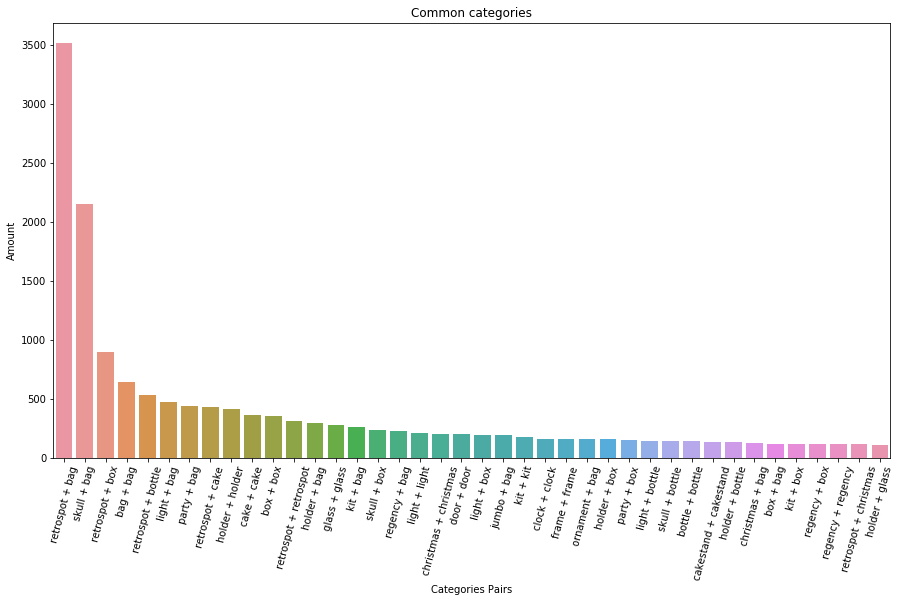

In [158]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="index", y="common_categories", data=compare_bundle.common_categories.value_counts().reset_index().head(40))
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set(xlabel='Categories Pairs', ylabel='Amount', title='Common categories')
plt.show()

Okay, so we got a table of pairs.
First ones:
* retrospot + bag          3510
* skull + bag              2148
* retrospot + box           891
* bag + bag                 640
* retrospot + bottle    
Doesnt look like much help since retrospot and skull seem to be the **adjectives**.

But these ones seem to be useful:
* light + bag               470
* party + bag               435
* holder + bag              292
* kit + bag                 263

It seems the the main item in category **bag** is often accompanied by such categories as **light** and **party**, holder, glass and kit.  
Further down in the list we can also see:
* bottle + light
* box + kit
* bag + christmas


## Conclusion.
We can see that such categories as:
* Bag
* Holder
* Box
* Glass
* Cake
* Light

Had a **greater tendency to be sold as single** items in absolute values.    
  
  We can see that such categories as:
* Bag
* Box
* Cake
* Christmas
* Holder
* Door
* Bottle

Had a **greater tendency to be sold in bundles** in abosulet values.

### However if we take in the account the quantity of the items, we will have slightly different results:
Now we can see that the categories that were mostly bought as single items **(main assortment)** are:
* Party accessories
* Clocks
* Frames
* Lanterns

If we look at the bottom of the list we can say which items were mostly sold as **additional assortment**:
* Ornament
* Napkins
* Bags
* Jumbo stuff
* Chalkboards
* Jam
* Hangers

### Now let's see what bundles of product groups are often present in shopping carts

Here's the most selling pairs
* light + bag               470
* party + bag               435
* holder + bag              292
* kit + bag                 263

It seems the the main item in category **bag** is often accompanied by such categories as **light** and **party**, holder, glass and kit.  
Further down in the list we can also see:
* bottle + light
* box + kit
* bag + christmas

# Step 5. Hypothesis testing.

μ1 = μ2  
We calculate t-test for the means of two **independent** samples of populations.  
We will use the golden standard of 5% as an alpha.<br/><br/><br/>

Our **null hypothesis** is that **the average check for a single bought items is the same as average check for items bought in bundles**.  μ1 = μ2  
Alternative hypothesis would be that the average differs.

Before actual testing let's get rid of the rows with negative quantity.

In [159]:
single_assortment = single_assortment.query('Quantity > 0')

In [160]:
bundle_assortment = bundle_assortment.query('Quantity > 0')

In [161]:
single_assortment.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,date,Revenue,month,lemmatized,category
25,536369,21756,bath building block word,3,2018-11-29 08:35:00,5.95,13047,2018-11-29,17.85,11,[bath building block word],other
46,536371,22086,paper chain kit 50's christmas,80,2018-11-29 09:00:00,2.55,13748,2018-11-29,204.00,11,"[paper chain kit, 's christmas]",christmas
65,536374,21258,victorian sewing box large,32,2018-11-29 09:09:00,10.95,15100,2018-11-29,350.40,11,[],box
105,536380,22961,jam making set printed,24,2018-11-29 09:41:00,1.45,17809,2018-11-29,34.80,11,[jam making],jam
252,536393,22180,retrospot lamp,8,2018-11-29 10:37:00,9.95,13747,2018-11-29,79.60,11,[retrospot lamp],retrospot


In [162]:
from scipy import stats as st



sample_1 = single_assortment['Revenue']
sample_2 = bundle_assortment['Revenue']

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
        sample_1, 
        sample_2,
equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")
        
      

p-value:  0.0015692969247021054
We reject the null hypothesis


We **reject the null hypothesis** and therefore conclude that the average check for the single item purchase differs from bundles.

### Conclusion.
Our **null hypothesis** was that **the average check for a single bought items is the same as average check for items bought in bundles**.  
After performing the hypothesis testing we've rejected the null hypothesis and came to a conclusion that the average check for the single item purchase differs from bundles.
____
____

# General Conclusions.

We've thoroughly analyzed an Online store and made several conclusions about its selling range.

When performing EDA we came to several conclusions:
* We can see that the majority of the items are priced **between 0.80 and 1.8$**
* By looking at the describe method we may conclude that most of the purcahses were made with 1 piece of an item, however about 50% of them had 2 or 3.
* we can see that the shop has an **increase in revenue** towards the end of the year.  

_____
_____
### In Range Analysis we've figured many interesting things:

We can see that such categories as:
* Bag
* Holder
* Box
* Glass
* Cake
* Light

Had a **greater tendency to be sold as single** items in absolute values.    
  
  We can see that such categories as:
* Bag
* Box
* Cake
* Christmas
* Holder
* Door
* Bottle

Had a **greater tendency to be sold in bundles** in abosulet values.

### However if we take in the account the quantity of the items, we will have slightly different results:
Now we can see that the categories that were mostly bought as single items **(main assortment)** are:
* Party accessories
* Clocks
* Frames
* Lanterns

If we look at the bottom of the list we can say which items were mostly sold as **additional assortment**:
* Ornament
* Napkins
* Bags
* Jumbo stuff
* Chalkboards
* Jam
* Hangers

### Now let's see what bundles of product groups are often present in shopping carts

Here's the most selling pairs
* light + bag               470
* party + bag               435
* holder + bag              292
* kit + bag                 263

It seems the the main item in category **bag** is often accompanied by such categories as **light** and **party**, holder, glass and kit.  
Further down in the list we can also see:
* bottle + light
* box + kit
* bag + christmas

_____
_____

### Hypothesis testing.
Our **null hypothesis** was that **the average check for a single bought items is the same as average check for items bought in bundles**.  
After performing the hypothesis testing we've rejected the null hypothesis and came to a conclusion that the average check for the single item purchase differs from bundles.

PDF Presentation link: https://drive.google.com/file/d/1JRF0Pzq7MkMffvb6sKi60Q0FDyW9Zw5k/view?usp=sharing

In [164]:
# https://drive.google.com/file/d/1JRF0Pzq7MkMffvb6sKi60Q0FDyW9Zw5k/view?usp=sharing

## Thank you! :)